In [1]:
import sqlite3
import subprocess
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from RAG import *
from PromptGenerator import *
import math


######

In [2]:
# Connect to the database
# conn = sqlite3.connect('funsearch.db')

conn = sqlite3.connect('funsearch_ship.db')


# Load data into DataFrame
df = pd.read_sql_query("SELECT * FROM experiments ORDER BY id", conn)

# Close connection
conn.close()


In [8]:
df.head()

,id,workload,policy,policy_description,workload_description,cpp_file_path,cache_hit_rate,score
0,1,astar,SHiP,SHiP (Signature-based Hit Predictor) is a cach...,The A* workload models a pathfinding algorithm...,ChampSim_CRC2/champ_repl_pol/ship.cc,0.210389,0.160599
1,2,lbm,SHiP,SHiP (Signature-based Hit Predictor) is a cach...,LBM (Lattice-Boltzmann Method) simulates fluid...,ChampSim_CRC2/champ_repl_pol/ship.cc,0.105613,0.160599
2,3,mcf,SHiP,SHiP (Signature-based Hit Predictor) is a cach...,The MCF workload solves the Minimum Cost Flow ...,ChampSim_CRC2/champ_repl_pol/ship.cc,0.475131,0.160599
3,4,milc,SHiP,SHiP (Signature-based Hit Predictor) is a cach...,MILC simulates Quantum Chromodynamics (QCD) ca...,ChampSim_CRC2/champ_repl_pol/ship.cc,0.009857,0.160599
4,5,omnetpp,SHiP,SHiP (Signature-based Hit Predictor) is a cach...,Omnet++ models a discrete-event network simula...,ChampSim_CRC2/champ_repl_pol/ship.cc,0.002004,0.160599


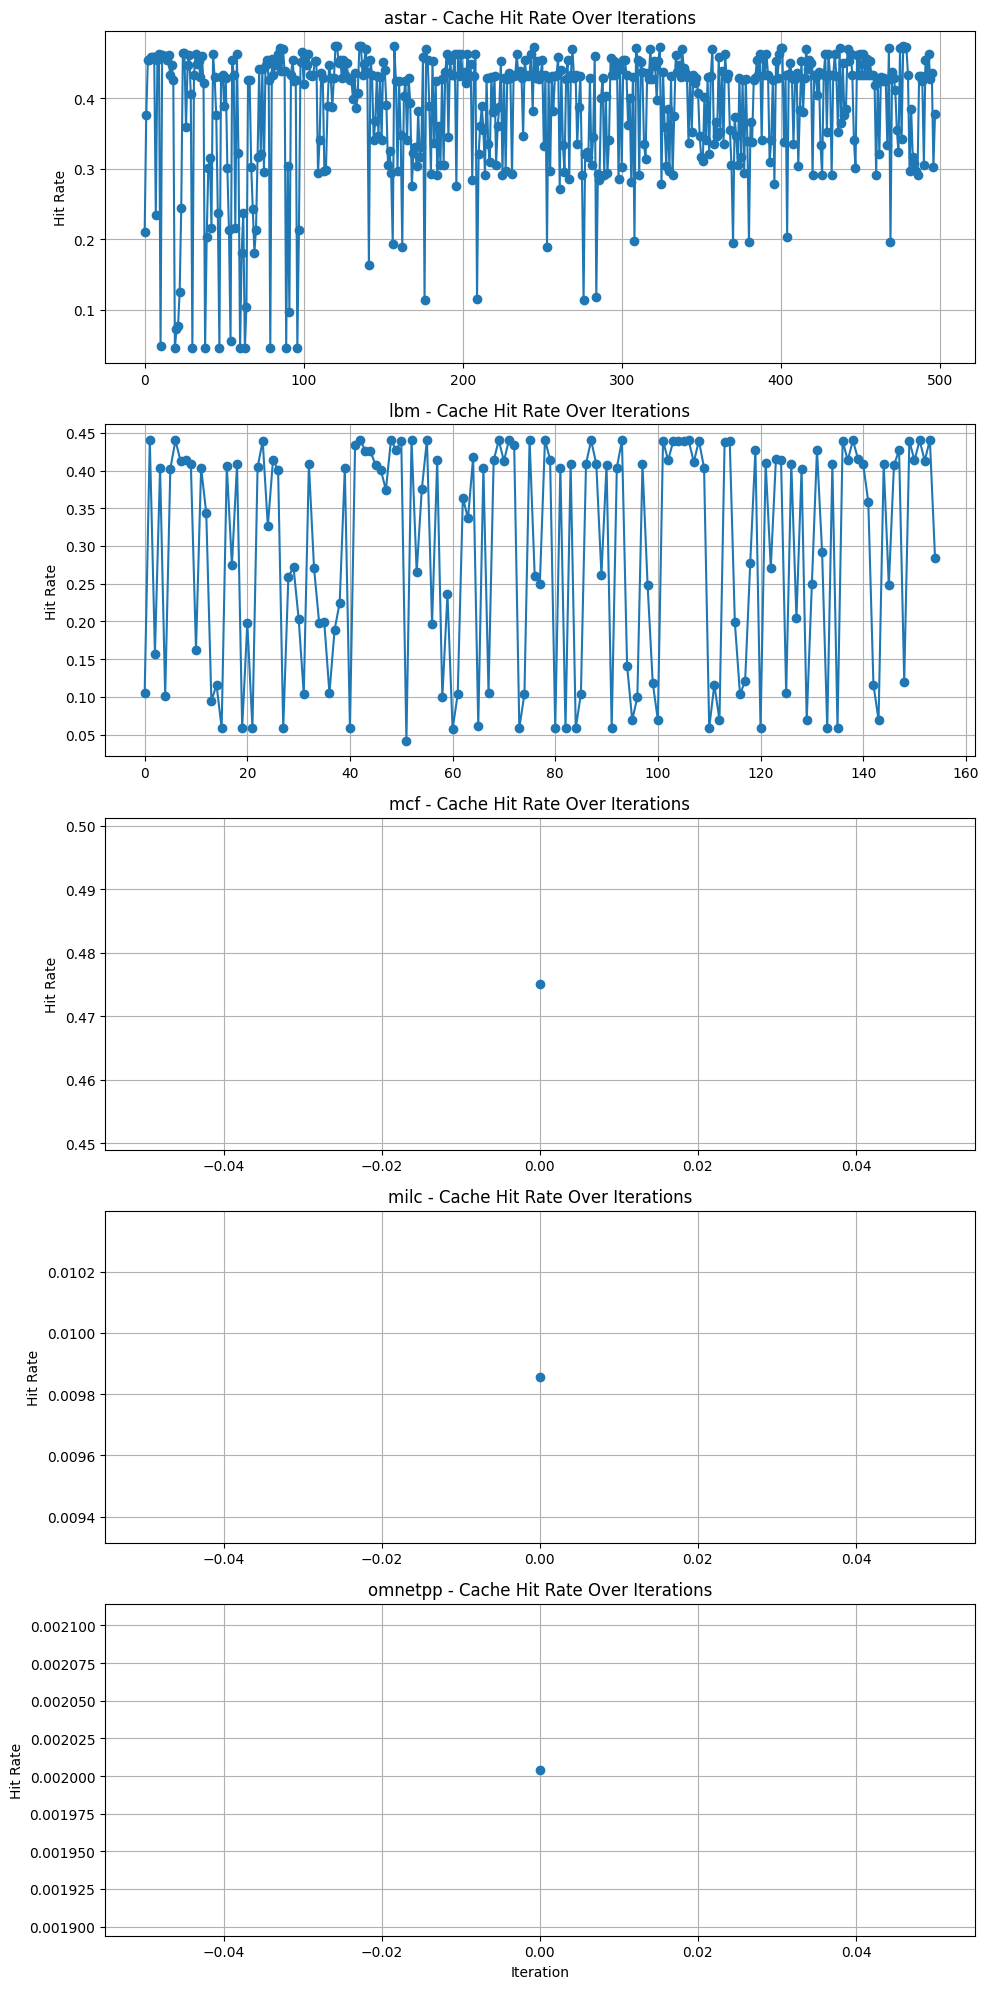

In [10]:
# # Get sorted unique workloads
# workloads = sorted(df['workload'].unique())
# n = len(workloads)

# # Calculate grid size (2 columns)
# cols = 2
# rows = math.ceil(n / cols)

# # Setup subplots
# fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
# axes = axes.flatten()

# # Plot each workload
# for i, workload in enumerate(workloads):
#     w_df = df[df['workload'] == workload].reset_index()
#     axes[i].plot(w_df.index, w_df['cache_hit_rate'], marker='o', linestyle='-')
#     axes[i].set_title(f"{workload} - Hit Rate")
#     axes[i].set_ylabel("Hit Rate")
#     axes[i].set_xlabel("Iteration")
#     axes[i].grid(True)

# # Hide unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])  # cleanly remove unused plots

# plt.tight_layout()
# plt.show()

# Get unique workloads
workloads = df['workload'].unique()
n = len(workloads)

# Setup subplots
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 4 * n), sharex=False)
if n == 1:
    axes = [axes]  # ensure axes is iterable even for one workload

# Plot each workload in a separate subplot
for i, workload in enumerate(workloads):
    w_df = df[df['workload'] == workload].reset_index()
    axes[i].plot(w_df.index, w_df['cache_hit_rate'], marker='o', linestyle='-')
    axes[i].set_title(f"{workload} - Cache Hit Rate Over Iterations")
    axes[i].set_ylabel("Hit Rate")
    axes[i].grid(True)

axes[-1].set_xlabel("Iteration")
plt.tight_layout()
plt.show()

In [27]:
hit_rate={'astar': [0.45454223305787467, 0.3573547794394494, 0.38901773944350737, 0.03709567109384967, 0.4110201774653078, 0.33821173935846005,0.210389233], 
    'lbm': [0.43985783443540666, 0.27289983516244354, 0.32972240516582263, 0.011593643367720617, 0.19358477211349756, 0.2615846099982021,0.1056126784], 
    'mcf': [0.4074020886631043, 0.5087725688923012, 0.5230175409101099, 0.515161598323247, 0.5200312710592792, 0.524743749964974,0.4751306287], 
    'milc': [0.3219114100958022, 0.06456693483565899, 0.23460321368313578, 0.00026430697263517673, 0.14627399581453615, 0.054986712238499026,0.009857201822], 
    'omnetpp': [0.4606533811310401, 0.6753672808393627, 0.6900525496418154, 0.008547620325799737, 0.4621028207407054, 0.698462878241108,0.00200418732]
}


policies = [
    "LRU","Hawkeye","Less is More","Multiperspective",
    "Reordering-based Cache Replacement","Ship++","SHiP",
]

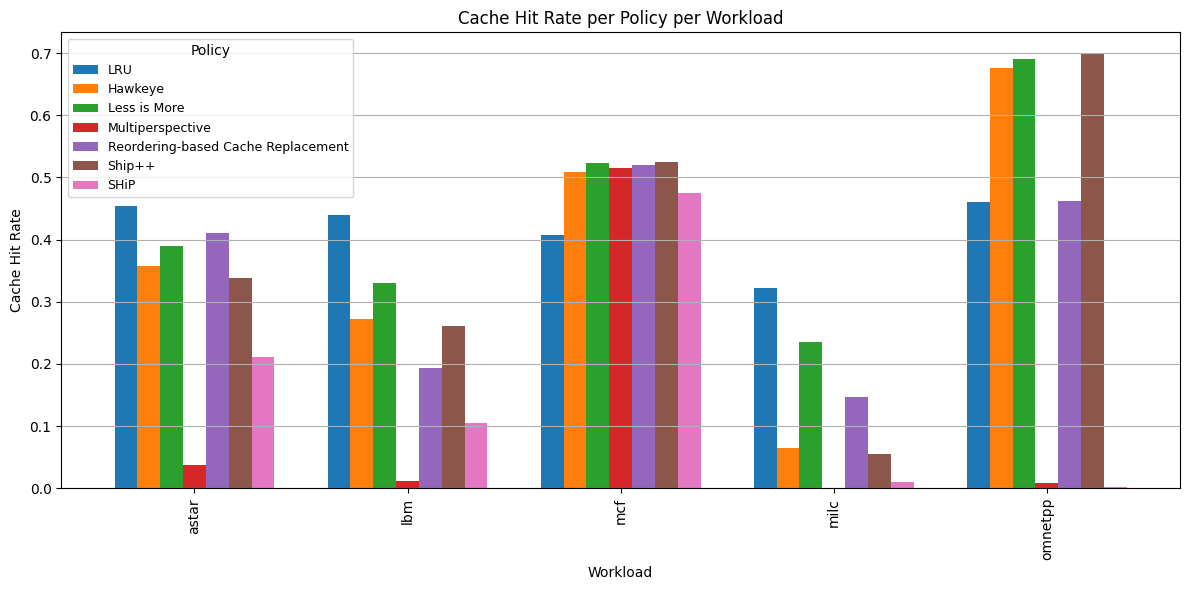

In [31]:
# Create DataFrame
df = pd.DataFrame(hit_rate, index=policies).T

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='bar', ax=ax, width=0.75)

# Title & labels
ax.set_ylabel("Cache Hit Rate")
ax.set_xlabel("Workload")
ax.set_title("Cache Hit Rate per Policy per Workload")
ax.grid(True, axis='y')

# Legend inside upper-left corner of the plot
# ax.legend(title="Policy", loc='upper left', frameon=True, fontsize=9)
ax.legend(title="Policy", loc='upper left', bbox_to_anchor=(0.01, 0.99))


plt.tight_layout()
plt.show()